In [2]:
###########################################################################
# In binary classification settings
# --------------------------------------------------------
#
# Create simple data
# ..................
#
# Try to differentiate the two first classes of the iris data

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], test_size=.5, random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

Average precision-recall score: 0.88


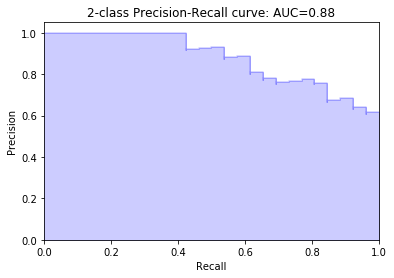

In [4]:
###########################################################################
# Compute the average precision score
# ...................................

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

##########################################################################
# Plot the Precision-Recall curve
# ................................

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))
plt.show()

Average precision score, micro-averaged over all classes: 0.43


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AUC=0.43')

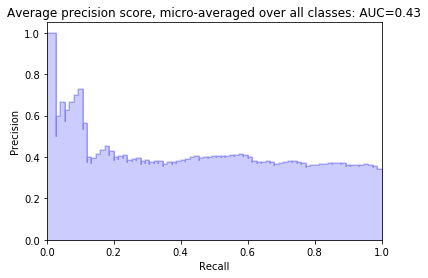

In [5]:
###########################################################################
# In multi-label settings
# ------------------------
#
# Create multi-label data, fit, and predict
# ...........................................
#
# We create a multi-label dataset, to illustrate the precision-recall in
# multi-label settings
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

###########################################################################
# The average precision score in multi-label settings
# ....................................................
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score [:, i])

# A "micro-average": quantifying score on all classes jointly

precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")

print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

###########################################################################
# Plot the micro-averaged Precision-Recall curve
# ...............................................
#
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AUC={0:0.2f}'.format(average_precision["micro"]))

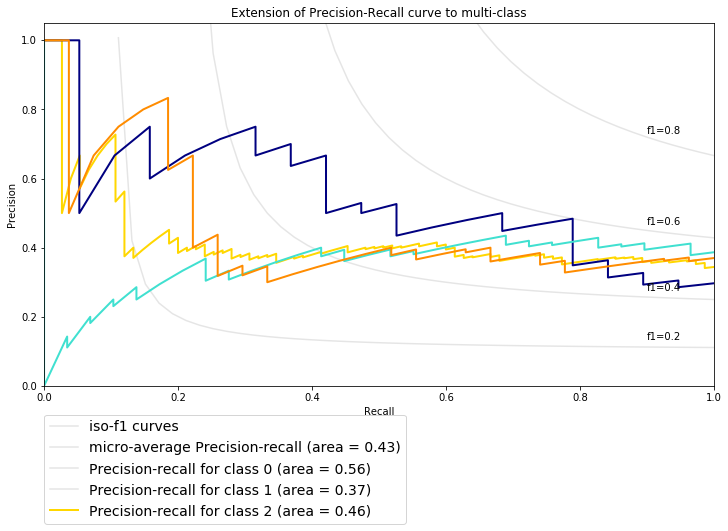

In [13]:
###########################################################################
# Plot Precision-Recall curve for each class and iso-f1 curves
# .............................................................
#
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
plt.figure(figsize=(12, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    lines.append(l)

labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})' ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'''.format(i, average_precision[i]))
    
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.show()